# U.S. Medical Insurance Costs

The goals for this portfolio project are:

    1. Investigate the dataset for potential bias towards certain attributes.
    2. Perform data analysis to learn about the data set such as:
        a. What are the main drivers of high insurance costs?
        b. What regions are the individuals in the dataset from?
        c. What correlation is there between some attributes and others?
    3. Communicate findings in an effective manner.


Import Dataset

In [1]:
import csv
region_list = []
with open('insurance.csv') as insurance_data:
    insurance_info = csv.DictReader(insurance_data, delimiter = ',')
    [region_list.append(row['region']) for row in insurance_info]


In [7]:
#import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### What is the regional distribution of the data?

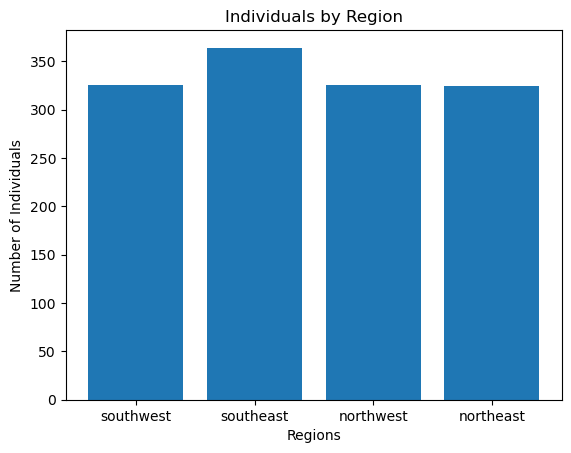

In [3]:
unique_region_list = []
for region in region_list:
    if region in unique_region_list:
        pass
    else:
        unique_region_list.append(region)
count_of_regions = []
for region in unique_region_list:
    count_of_regions.append(region_list.count(region))
regional_distribution = {region:count for region, count in zip(unique_region_list, count_of_regions)}
    
#print(unique_region_list)
#print(count_of_regions)
#print(regional_distribution)

import matplotlib.pyplot as plt

x_axis = unique_region_list
y_axis = count_of_regions

plt.bar(x_axis, y_axis)
plt.title('Individuals by Region')
plt.xlabel('Regions')
plt.ylabel('Number of Individuals')
plt.show()

Takeaway: The dataset appears to be spread evenly across the Regions

### What is the age distribution of the data?

['< 20', '20 - 29', '30 - 39', '40 - 49', '60 - 69', '50 - 59']
[137, 280, 257, 279, 114, 271]


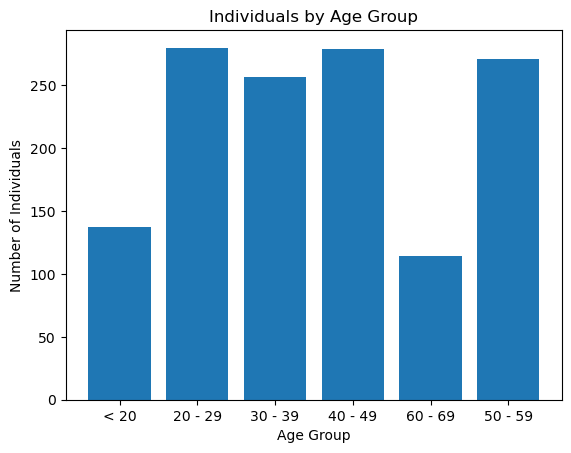

In [4]:
import csv
age_list = []
with open('insurance.csv') as insurance_data:
    insurance_info = csv.DictReader(insurance_data, delimiter = ',')
    [age_list.append(row['age']) for row in insurance_info]

age_list_int = []
for age in age_list:
    age_list_int.append(int(age))

age_list_grouped = []
for age in age_list_int:
    if age < 20:
        group = "< 20"
    elif age >= 20 and age < 30:
        group = "20 - 29"
    elif age >= 30 and age < 40:
        group = "30 - 39"
    elif age >= 40 and age < 50:
        group = "40 - 49"
    elif age >= 50 and age < 60:
        group = "50 - 59"
    elif age >= 60 and age < 70:
        group = "60 - 69"
    elif age >= 70:
        group = ">= 70"
    age_list_grouped.append(group)

unique_age_list = []
for age in age_list_grouped:
    if age in unique_age_list:
        pass
    else:
        unique_age_list.append(age)
        
count_of_ages = []
for age in unique_age_list:
    count_of_ages.append(age_list_grouped.count(age))
print(unique_age_list)
print(count_of_ages)
import matplotlib.pyplot as plt

x_axis = unique_age_list
y_axis = count_of_ages

plt.bar(x_axis, y_axis)
plt.title('Individuals by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Individuals')
plt.show()

Takeaway: The dataset appears to be spread evenly across the ages of 20 - 59, but has less individauals less than 20 years old or greater than 60 years old. This makes sense as people in those age groups are less likely to be in the workforce.

### Which Attribute Affects Insurance Cost the Most?

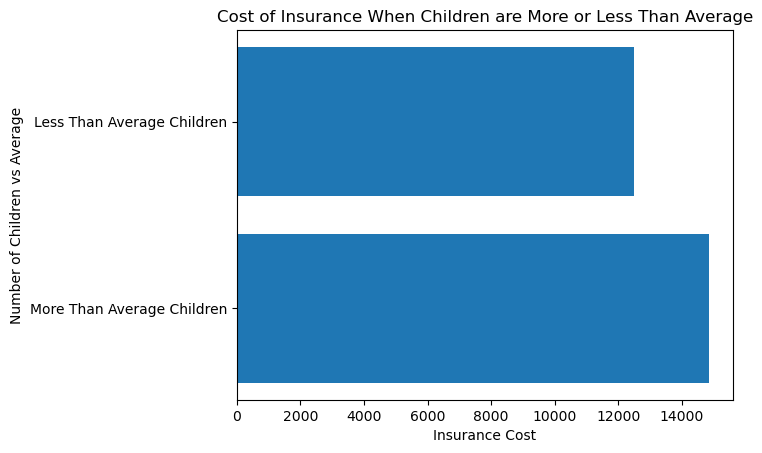

440
898
1338


In [23]:
insurance_data_dict = []
#import csv

with open('insurance.csv') as insurance_data:
    insurance_info = csv.DictReader(insurance_data, delimiter = ',')
    for row in insurance_info:
        insurance_data_dict.append(row) 

for records in insurance_data_dict:
    for key in records:
        if key == 'bmi' or key == 'charges':
            records[key] = float(records[key])
        if key == 'children' or key == 'age':
            records[key] = int(records[key])

sum_children = 0
for record in insurance_data_dict:
    sum_children += record['children']
average_children = sum_children / len(insurance_data_dict)

more_children_cost = 0
more_children_count = 0
less_children_cost = 0
less_children_count = 0
for record in insurance_data_dict:
    if record['children'] > average_children:
        more_children_cost += record['charges']
        more_children_count += 1
    else:
        less_children_cost += record['charges']
        less_children_count += 1
children_names = ['More Than Average Children', 'Less Than Average Children']
children_data = [more_children_cost/more_children_count, less_children_cost/less_children_count]

#import matplotlib.pyplot as plt
y=children_names
 
x=children_data
plt.barh(y, x)

plt.ylabel('Number of Children vs Average')

plt.xlabel('Insurance Cost') 
plt.title('Cost of Insurance When Children are More or Less Than Average')
#plt.ticklabel_format(style='plain') 
#plt.set_major_formatter(currency)
plt.show()


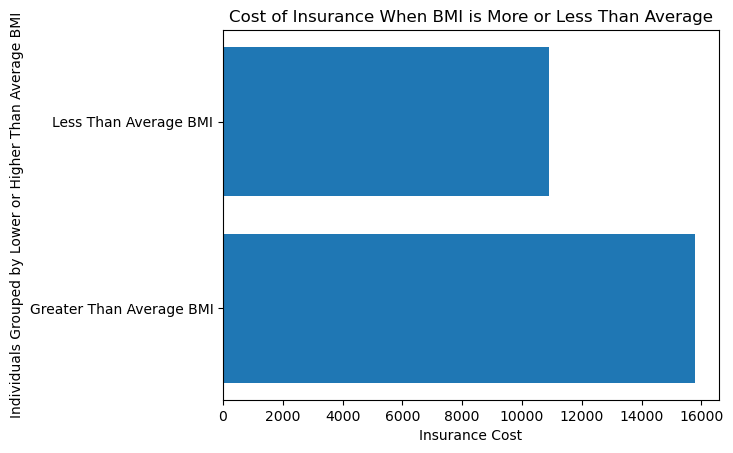

In [26]:
sum_bmi = 0
for record in insurance_data_dict:
    sum_bmi += record['bmi']
average_bmi = sum_bmi / len(insurance_data_dict)

more_bmi_cost = 0
more_bmi_count = 0
less_bmi_cost = 0
less_bmi_count = 0
for record in insurance_data_dict:
    if record['bmi'] > average_bmi:
        more_bmi_cost += record['charges']
        more_bmi_count += 1
    else:
        less_bmi_cost += record['charges']
        less_bmi_count += 1
bmi_names = ['Greater Than Average BMI', 'Less Than Average BMI']
bmi_data = [more_bmi_cost/more_bmi_count, less_bmi_cost/less_bmi_count]

#import matplotlib.pyplot as plt
y=bmi_names
 
x=bmi_data
plt.barh(y, x)

plt.ylabel('Individuals Grouped by Lower or Higher Than Average BMI')

plt.xlabel('Insurance Cost') 
plt.title('Cost of Insurance When BMI is More or Less Than Average')
#plt.ticklabel_format(style='plain') 
#plt.set_major_formatter(currency)
plt.show()


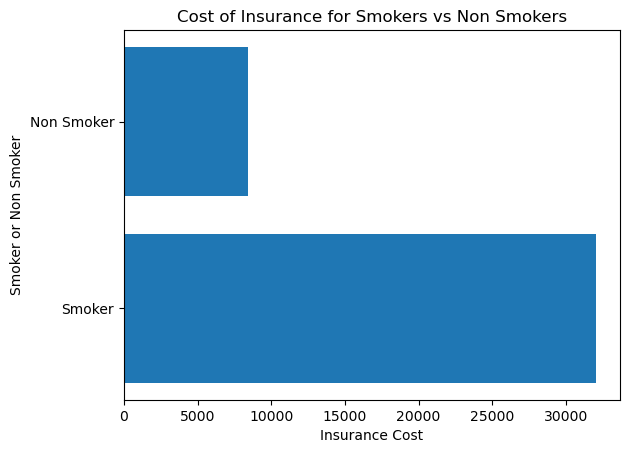

In [27]:
sum_bmi = 0
for record in insurance_data_dict:
    sum_bmi += record['bmi']
average_bmi = sum_bmi / len(insurance_data_dict)

smoker_cost = 0
smoker_count = 0
non_smoker_cost = 0
non_smoker_count = 0
for record in insurance_data_dict:
    if record['smoker'] == 'yes':
        smoker_cost += record['charges']
        smoker_count += 1
    else:
        non_smoker_cost += record['charges']
        non_smoker_count += 1
smoker_names = ['Smoker', 'Non Smoker']
smoker_data = [smoker_cost/smoker_count, non_smoker_cost/non_smoker_count]

#import matplotlib.pyplot as plt
y=smoker_names
 
x=smoker_data
plt.barh(y, x)

plt.ylabel('Smoker or Non Smoker')

plt.xlabel('Insurance Cost') 
plt.title('Cost of Insurance for Smokers vs Non Smokers')
#plt.ticklabel_format(style='plain') 
#plt.set_major_formatter(currency)
plt.show()


Conclusion: Smoking is likely the biggest contributor to Insurance Cost